**Decision Tree**

In [1]:
#Terms needed Entropy, infromation gain, Gini impurity(Depending on the use case it is selected)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("drug200.csv")

In [9]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [10]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [11]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [15]:
#No NULL values
#Target Var = Drug
##Classification type = Decision tree

**Data Preprocessing**

In [21]:
df[df.duplicated()]
#No duplicate

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [25]:
x = df.Sex.value_counts()

In [26]:
x

Sex
M    104
F     96
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

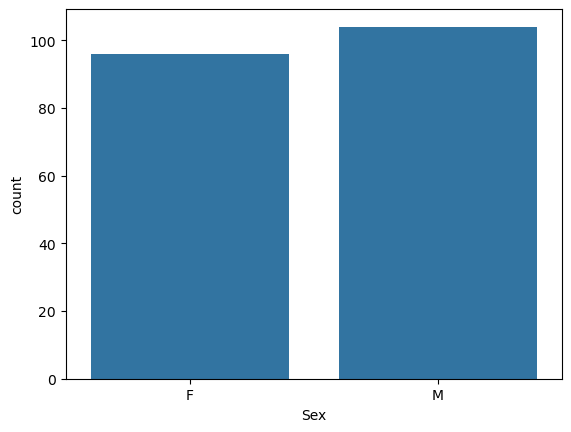

In [27]:
p = sns.countplot(data = df, x = "Sex")
plt.show

In [28]:
y = df.Drug.value_counts()

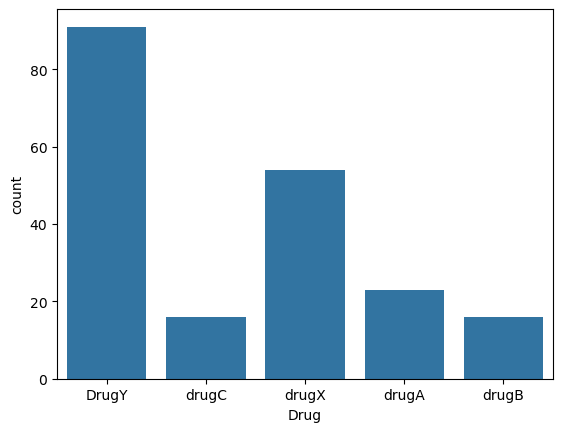

In [32]:
p = sns.countplot(data = df, x = "Drug",)
plt.show()

In [31]:
y

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [33]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

C:\Users\LAYAP\AppData\Local\Temp\ipykernel_15516\2827534500.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug']== 'drugY']['Age'], color = "green" )
C:\Users\LAYAP\miniconda3\envs\hands_on_ml\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\LAYAP\AppData\Local\Temp\ipykernel_15516\2827534500.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms

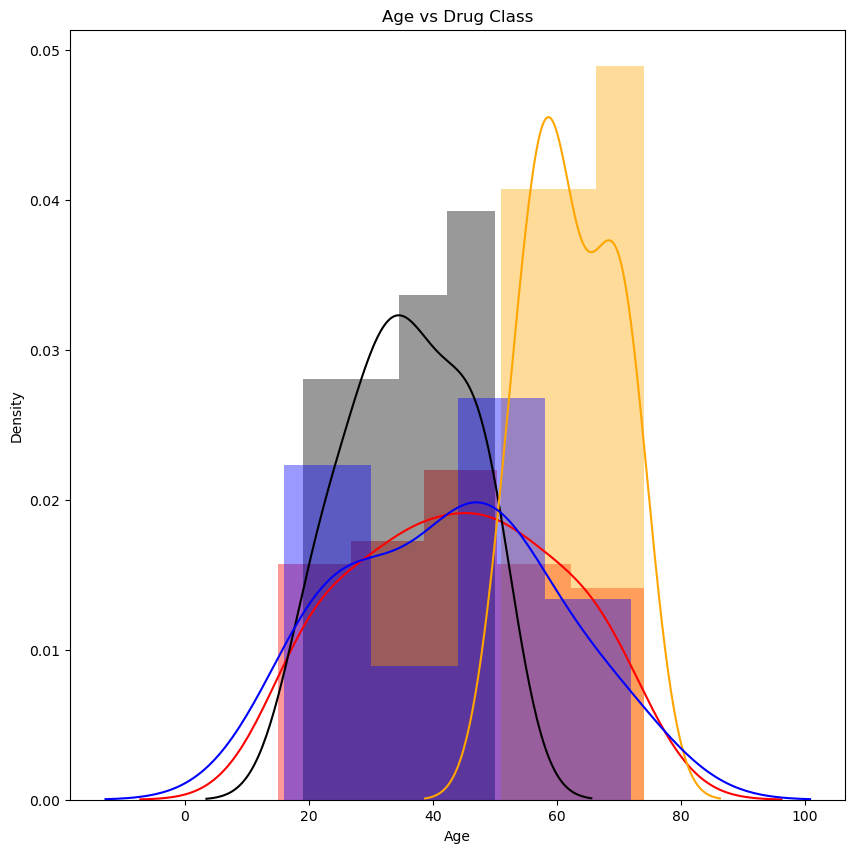

In [43]:
plt.figure(figsize = (10,10))
sns.distplot(df[df['Drug']== 'drugY']['Age'], color = "green" )
sns.distplot(df[df['Drug']== 'drugX']['Age'], color = "red" )
sns.distplot(df[df['Drug']== 'drugA']['Age'], color = "black" )
sns.distplot(df[df['Drug']== 'drugB']['Age'], color = "orange" )
sns.distplot(df[df['Drug']== 'drugC']['Age'], color = "blue")
plt.title("Age vs Drug Class")
plt.show()

In [47]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
#oe is used to change data in categorical formate into numerical formate(changes data into numerical catagory)

In [52]:
df['BP'] = oe.fit_transform(df[['BP']])
df['Sex'] = oe.fit_transform(df[['Sex']])
df['Cholesterol'] = oe.fit_transform(df[['Cholesterol']])
df['Drug'] = oe.fit_transform(df[['Drug']])

In [53]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,3.0
2,47,1.0,1.0,0.0,10.114,3.0
3,28,0.0,2.0,0.0,7.798,4.0
4,61,0.0,1.0,0.0,18.043,0.0


In [54]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,3.0
2,47,1.0,1.0,0.0,10.114,3.0
3,28,0.0,2.0,0.0,7.798,4.0
4,61,0.0,1.0,0.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,3.0
196,16,1.0,1.0,0.0,12.006,3.0
197,52,1.0,2.0,0.0,9.894,4.0
198,23,1.0,2.0,1.0,14.020,4.0


In [56]:
X = df.drop("Drug", axis = 1)
y = df["Drug"]

In [57]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [59]:
y

0      0.0
1      3.0
2      3.0
3      4.0
4      0.0
      ... 
195    3.0
196    3.0
197    4.0
198    4.0
199    4.0
Name: Drug, Length: 200, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state = 0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [80]:
y_pred = clf_gini.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [81]:
print("Accuracy Score =", accuracy_score(y_test, y_pred))
print("Confusion Matrix =\n", confusion_matrix(y_test, y_pred))
print("Classification Report =\n", classification_report(y_test, y_pred))

Accuracy Score = 1.0
Confusion Matrix =
 [[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
Classification Report =
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00         6
         2.0       1.00      1.00      1.00         3
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [85]:
from sklearn import tree

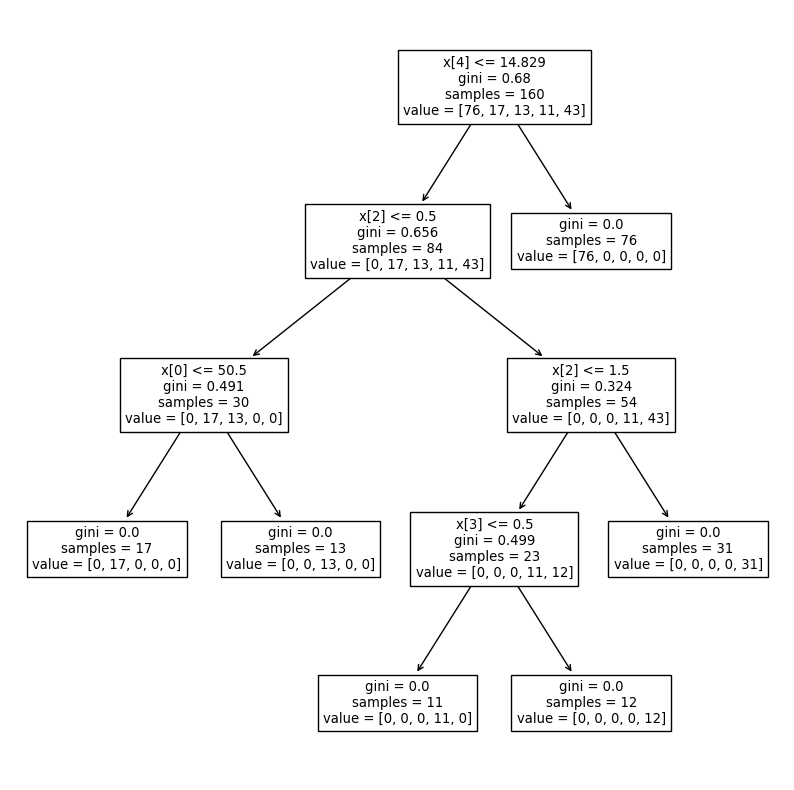

In [88]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf_gini.fit(X_train,y_train))
plt.show()